In [1]:
import xarray as xr

reanalysis = xr.open_zarr(
    'gs://gcp-public-data-arco-era5/ar/full_37-1h-0p25deg-chunk-1.zarr-v3',
    chunks=None,
    storage_options=dict(token='anon'),
)

c:\Users\ls2236\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [2]:
reanalysis

<xarray.Dataset>
Dimensions:                                                          (
                                                                      time: 1323648,
                                                                      latitude: 721,
                                                                      longitude: 1440,
                                                                      level: 37)
Coordinates:
  * latitude                                                         (latitude) float32 ...
  * level                                                            (level) int64 ...
  * longitude                                                        (longitude) float32 ...
  * time                                                             (time) datetime64[ns] ...
Data variables: (12/273)
    100m_u_component_of_wind                                         (time, latitude, longitude) float32 ...
    100m_v_component_of_wind                                         (time, latitude, longitude) float32 ...
    10m_u_component_of_neutral_wind                                  (time, latitude, longitude) float32 ...
    10m_u_component_of_wind                                          (time, latitude, longitude) float32 ...
    10m_v_component_of_neutral_wind                                  (time, latitude, longitude) float32 ...
    10m_v_component_of_wind                                          (time, latitude, longitude) float32 ...
    ...                                                               ...
    wave_spectral_directional_width_for_swell                        (time, latitude, longitude) float32 ...
    wave_spectral_directional_width_for_wind_waves                   (time, latitude, longitude) float32 ...
    wave_spectral_kurtosis                                           (time, latitude, longitude) float32 ...
    wave_spectral_peakedness                                         (time, latitude, longitude) float32 ...
    wave_spectral_skewness                                           (time, latitude, longitude) float32 ...
    zero_degree_level                                                (time, latitude, longitude) float32 ...
Attributes:
    valid_time_start:  1940-01-01
    last_updated:      2024-08-27 07:32:47.309165
    valid_time_stop:   2024-05-31

In [3]:
recent_an = reanalysis.sel(time=slice('2020-01-01 12:00:00', '2020-01-10 12:00:00'))

recent_an

<xarray.Dataset>
Dimensions:                                                          (
                                                                      time: 217,
                                                                      latitude: 721,
                                                                      longitude: 1440,
                                                                      level: 37)
Coordinates:
  * latitude                                                         (latitude) float32 ...
  * level                                                            (level) int64 ...
  * longitude                                                        (longitude) float32 ...
  * time                                                             (time) datetime64[ns] ...
Data variables: (12/273)
    100m_u_component_of_wind                                         (time, latitude, longitude) float32 ...
    100m_v_component_of_wind                                         (time, latitude, longitude) float32 ...
    10m_u_component_of_neutral_wind                                  (time, latitude, longitude) float32 ...
    10m_u_component_of_wind                                          (time, latitude, longitude) float32 ...
    10m_v_component_of_neutral_wind                                  (time, latitude, longitude) float32 ...
    10m_v_component_of_wind                                          (time, latitude, longitude) float32 ...
    ...                                                               ...
    wave_spectral_directional_width_for_swell                        (time, latitude, longitude) float32 ...
    wave_spectral_directional_width_for_wind_waves                   (time, latitude, longitude) float32 ...
    wave_spectral_kurtosis                                           (time, latitude, longitude) float32 ...
    wave_spectral_peakedness                                         (time, latitude, longitude) float32 ...
    wave_spectral_skewness                                           (time, latitude, longitude) float32 ...
    zero_degree_level                                                (time, latitude, longitude) float32 ...
Attributes:
    valid_time_start:  1940-01-01
    last_updated:      2024-08-27 07:32:47.309165
    valid_time_stop:   2024-05-31

In [4]:
ts = recent_an.sel(latitude=51,longitude=0)

In [5]:
y = ts['2m_temperature'].values -273.15
x = ts['time'].values

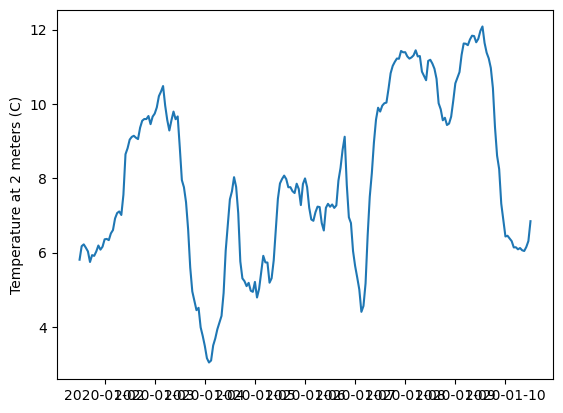

In [6]:
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.ylabel("Temperature at 2 meters (C)")
plt.show()